In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:

df = pd.read_excel("SalesAljazira.xlsx")

In [3]:
df.head()

,Date,Data
0,2019-01-01,363901.92
1,2019-01-02,338171.22
2,2019-01-03,364367.40
3,2019-01-04,374409.70
4,2019-01-05,390899.76


In [4]:
df.describe()

,Data
count,207.000000
mean,407887.127971
std,67816.696478
min,253937.600000
25%,353799.750000
50%,399689.520000
75%,459272.475000
max,585661.300000


In [7]:
df['Date'].min(), df['Date'].max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-07-26 00:00:00'))

In [9]:
df= df.sort_values('Date')
df.isnull().sum()

Date    0
Data    0
dtype: int64

In [10]:
df = df.groupby('Date')['Data'].sum().reset_index()

In [11]:
df = df.set_index('Date')
df.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-07-17', '2019-07-18', '2019-07-19', '2019-07-20',
               '2019-07-21', '2019-07-22', '2019-07-23', '2019-07-24',
               '2019-07-25', '2019-07-26'],
              dtype='datetime64[ns]', name='Date', length=207, freq=None)

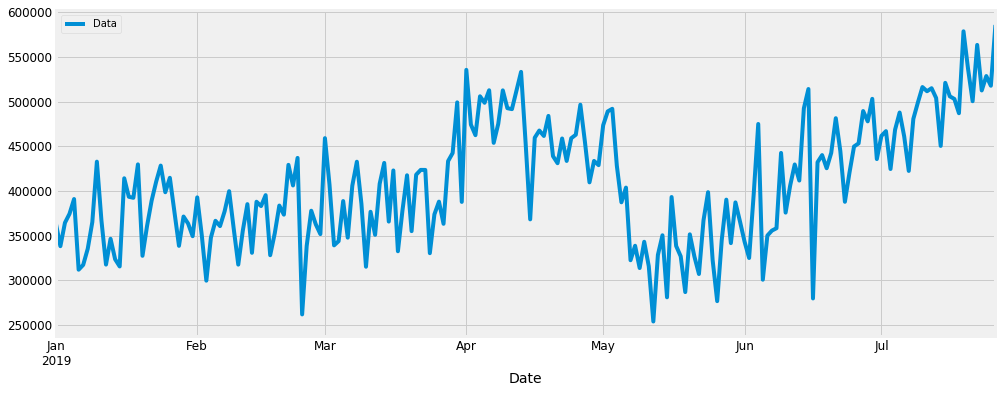

In [12]:
df.plot(figsize=(15, 6))
plt.show()

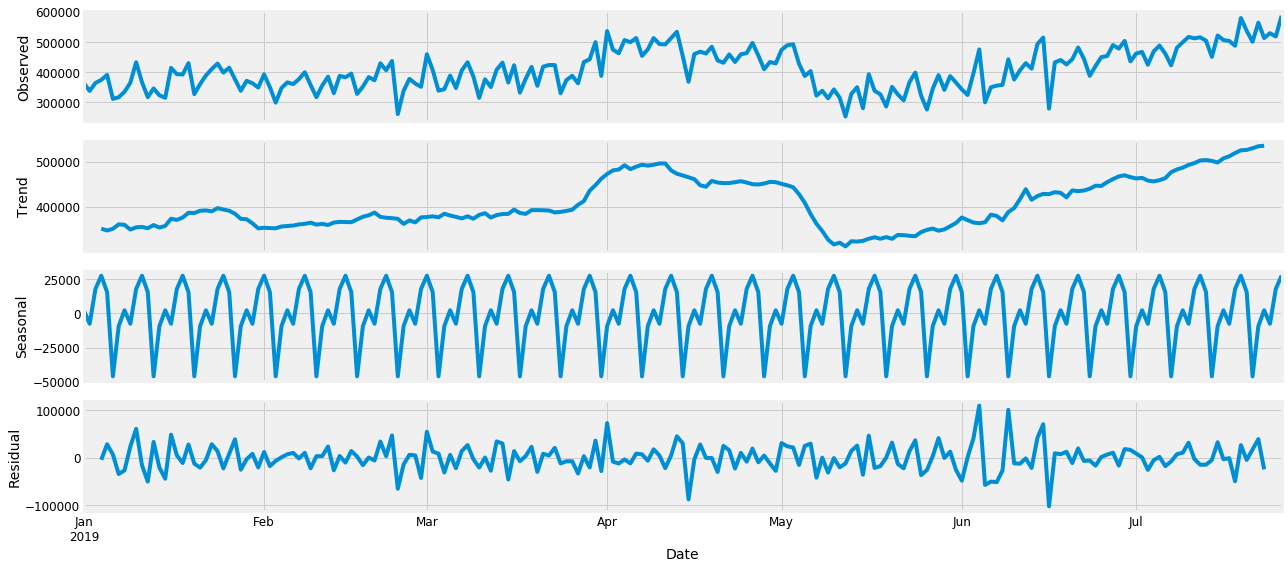

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

In [14]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [16]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:5914.941791780103
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:5452.450837919072
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4899.023204458559

C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)



ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4586.843667881448
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4924.010052940452


C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4896.936605411765
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4611.618281300034


C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4588.388536502491
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:5745.303920981278
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:5380.447328912847

C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)



ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4848.4654701333675


C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4522.116450068532
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:5413.81232077437


C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:5359.965599935376
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4574.948177690223


C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4523.660477344974
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:5041.7144853163845
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4747.5841609681465
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:4915.042994008554


C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4525.370143836675
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:4770.8897146788695


C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:4748.823041456714
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:4565.040497170583


C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:4508.6219627358505
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:4946.7049027939665
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:4655.186918484108

C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)



ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:4819.074872498976


C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:4460.955924810793
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:4703.937607361169


C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:4654.880668220092
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:4530.367218820339

C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)



ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:4459.402974759716
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:5067.193261994532
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:4772.615981346679


C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:4870.5485827619905
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:4528.444769174846

C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)



ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:4772.760640783608


C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:4774.585602561615
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:4531.388661290637


C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:4526.556180806454
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:4971.420184535507


C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:4679.849930549458
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:4840.07633332011


C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:4475.484613873435
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:4705.802430900236


C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:4681.213397895379


C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:4521.79626235023


C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:4474.33378566528
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:5010.373161483841
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:4710.923660704782
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:4892.124711683509


C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:4508.056456066611
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:4712.074765468722
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:4712.678437516454

C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)



ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:4531.364034735852


C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:4505.072280940922
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:4947.842774188777


C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:4656.772215851817
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:4819.801346746037


C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:4462.035565492797
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:4682.089786135104


C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:4656.576365964744


C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:4505.328035503559


C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:4460.438497859237


In [17]:
    mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\21264\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0105      0.241     -0.044      0.965      -0.484       0.463
ma.L1         -0.5958      0.161     -3.697      0.000      -0.912      -0.280
ar.S.L12      -0.2192      0.201     -1.090      0.276      -0.614       0.175
ma.S.L12      -0.6505      0.104     -6.254      0.000      -0.854      -0.447
sigma2      5.129e+09   1.12e-11   4.58e+20      0.000    5.13e+09    5.13e+09


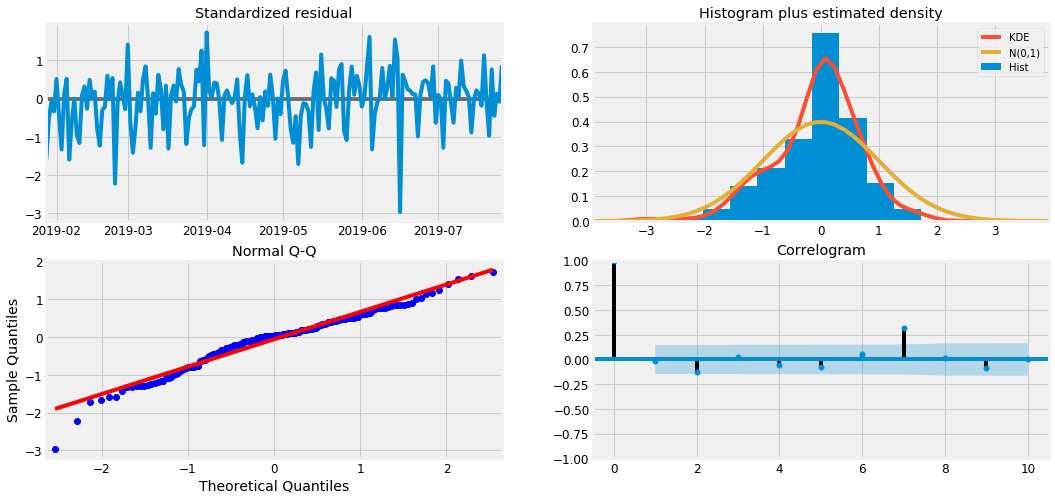

In [18]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [2]:
pred = results.get_prediction(start=pd.to_datetime('2019-05-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

NameError: name 'results' is not defined

In [25]:
y_forecasted = pred.predicted_mean
y_t = df['2019-05-01':]

In [28]:
y_truth=y_t.squeeze()

In [29]:
y_truth

Date
2019-05-01    473457.60
2019-05-02    488941.60
2019-05-03    491871.80
2019-05-04    428034.60
2019-05-05    387247.00
2019-05-06    403691.40
2019-05-07    322478.80
2019-05-08    338658.60
2019-05-09    313737.20
2019-05-10    343068.60
2019-05-11    315726.60
2019-05-12    253937.60
2019-05-13    328407.80
2019-05-14    350369.60
2019-05-15    280995.40
2019-05-16    393163.34
2019-05-17    338426.66
2019-05-18    326829.24
2019-05-19    286822.56
2019-05-20    351418.52
2019-05-21    326642.66
2019-05-22    307041.94
2019-05-23    367110.88
2019-05-24    398574.16
2019-05-25    322695.02
2019-05-26    276688.32
2019-05-27    345231.92
2019-05-28    390217.34
2019-05-29    341608.34
2019-05-30    387153.50
                ...    
2019-06-27    489370.83
2019-06-28    477821.50
2019-06-29    503007.96
2019-06-30    435638.45
2019-07-01    461546.15
2019-07-02    466860.55
2019-07-03    424516.17
2019-07-04    468502.32
2019-07-05    487719.57
2019-07-06    460900.83
2019-07-07 

In [19]:
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

NameError: name 'y_forecasted' is not defined

In [20]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

NameError: name 'mse' is not defined

In [ ]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = df.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel(' Sales')
plt.legend()
plt.show()

In [60]:
pred_uc.predicted_mean.to_excel("Results__Daily.xlsx")